In [14]:
import numpy as np
import pandas as pd

In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
data=load_breast_cancer()
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_trin,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf=RandomForestClassifier()
rf.fit(x_trin,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

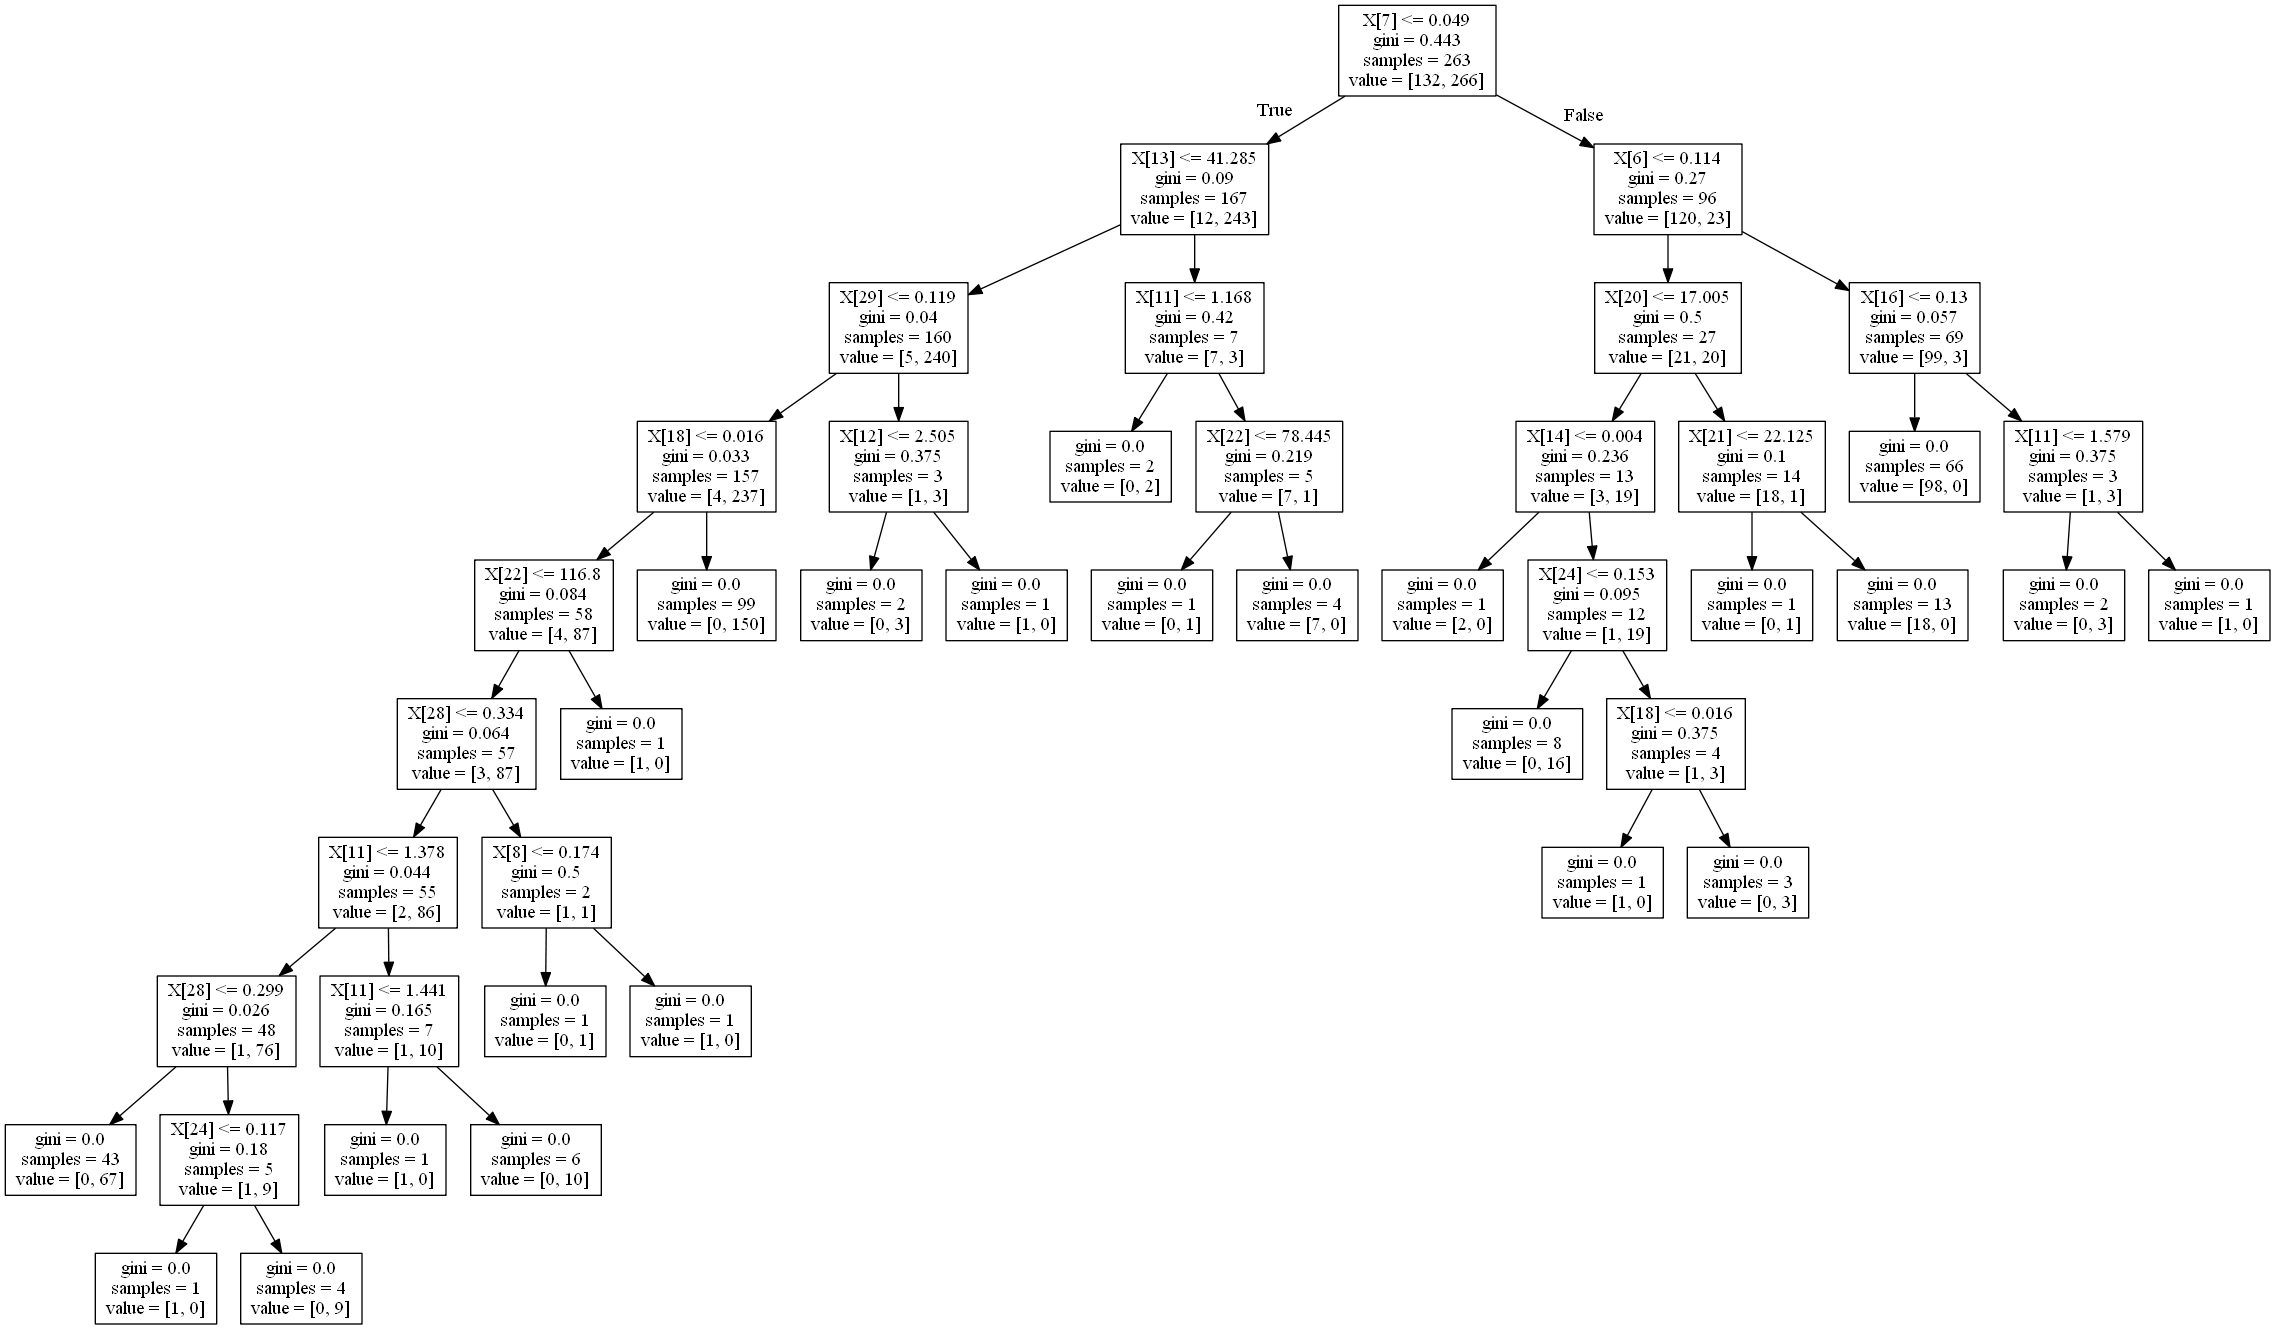

In [34]:
dot_data=StringIO()
e=rf.estimators_[5]
export_graphviz(e,out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
y_predict=rf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print(accuracy_score(y_test,y_predict))

0.9590643274853801


In [38]:
from sklearn.svm import SVC

In [39]:
svc=SVC(kernel='rbf',C =0.1,gamma=10)

In [40]:
svc.fit(x_trin,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_predict_svc=svc.predict(x_test)
print(accuracy_score(y_test,y_predict_svc))

0.5789473684210527
